In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ctypes
from ctypes import POINTER, c_int, c_double, c_void_p, c_char_p
import sys

%matplotlib inline

In [2]:
lib = ctypes.CDLL("./main.so")
lib.parse.restype = c_void_p
lib.parse.argtypes = [c_char_p]

In [3]:
def call_func(func, fs, n, h, x0, y0):
    out_x = np.zeros(n, dtype=np.float64)
    out_y = np.zeros(n, dtype=np.float64)
    ptr_x = out_x.__array_interface__['data'][0]
    ptr_y = out_y.__array_interface__['data'][0]
    f = lib.parse(fs.encode())
    func.argtypes = [c_void_p, c_int, c_double, c_double, c_double, c_void_p, c_void_p]
    func(f, n, h, x0, y0, ptr_x, ptr_y)
    return out_x, out_y

In [4]:
call_func(lib.euler, 'sin(x)', 10, 0.2, 0.0, 0.0)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 array([0.        , 0.        , 0.03973387, 0.11761753, 0.23054603,
        0.37401725, 0.54231144, 0.72871926, 0.92580921, 1.12572393]))

In [33]:
funcs = ["sin(x)", "cos(x)", "y + 1", "x + y"]
corrects = [lambda x: 1 - np.cos(x), lambda x: np.sin(x), lambda x: np.exp(x) - 1, lambda x: np.exp(x) - x - 1]
ns = [10, 100, 10 ** 4, 10 ** 6]
for i in range(len(funcs)):
    print('y = ' + funcs[i], end='\t')
    for j in range(len(ns)):
        result = call_func(lib.euler, funcs[i], ns[j], 10 / ns[j], 0, 0)
        corr = corrects[i](result[0])
        loss = (np.abs(corr - result[1]) / np.maximum(corr, 1)).max()
        print(loss, end='\t')
    print('')

y = sin(x)	0.5166017163690824	0.05071566917797132	0.0005000831083806778	5.0000394824500916e-06	
y = cos(x)	0.9830354612611302	0.09996400247203557	0.0010000000048689464	1.00000403869174e-05	
y = y + 1	0.9369298066314994	0.37143877983177054	0.004983935899098896	5.000042740951545e-05	
y = x + y	0.9379717293812379	0.37162338533781203	0.00498620177247916	5.002313825890752e-05	


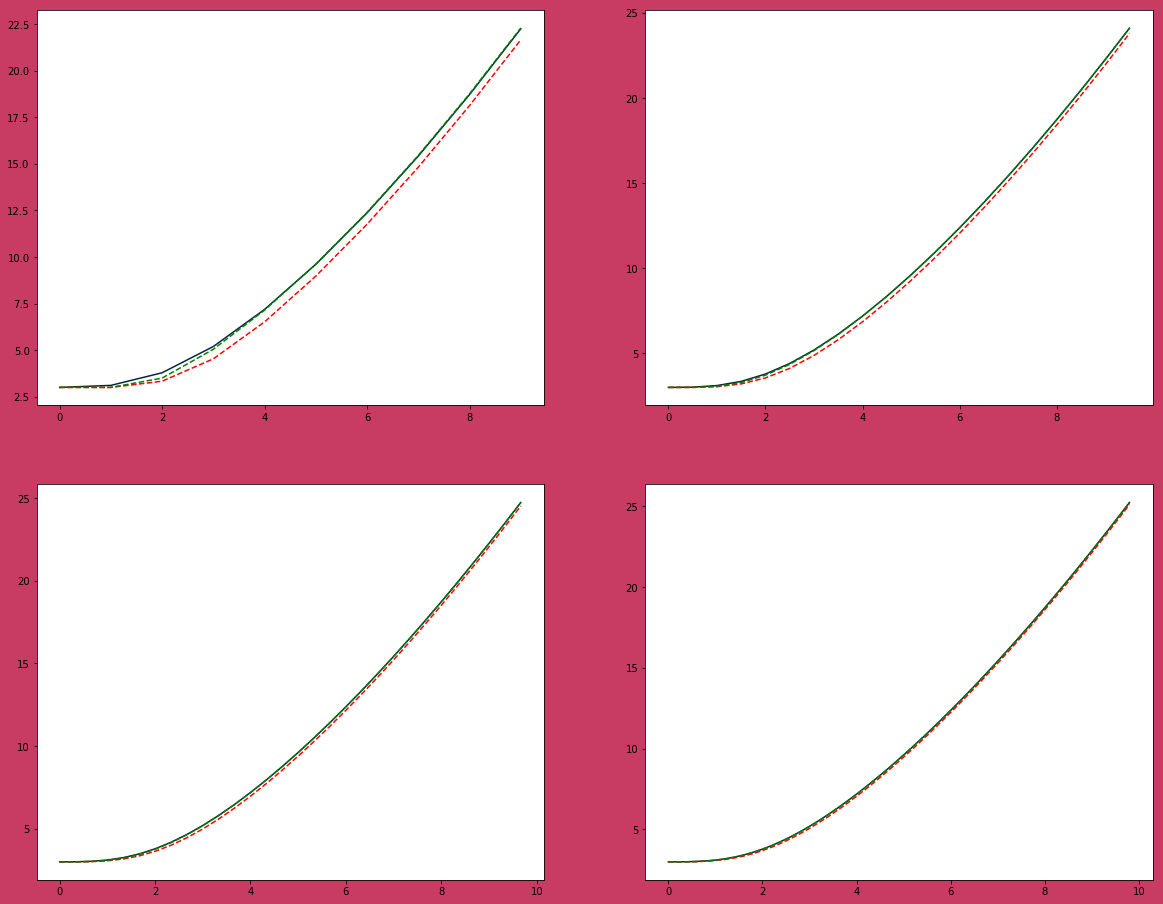

In [58]:
f = 'x * x / y'
x0 = 0
y0 = 3
plt.rcParams['figure.facecolor'] = '#C83C64'
plt.figure(figsize=(20, 16))
for i, n in enumerate([10, 20, 30, 50]):
    plt.subplot(2, 2, i + 1)
    x, y = call_func(lib.euler, f, n, 10 / n, 0, 3)
    c = np.sqrt(2 / 3 * x ** 3 + 9)
    plt.plot(x, c, '#02283C')
    plt.plot(x, y, '--r')
    x, y = call_func(lib.adams, f, n, 10 / n, 0, 3)
    plt.plot(x, y, '--g')